### import

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

### load

In [2]:
FOLDER = r'C:\Users\happp\Documents\2024_ScienceFair_Mirror'

In [81]:
exp_types = ['BR', 'BY', 'RB', 'RY', 'YB', 'YR']

data = np.load(os.path.join(FOLDER, f"PreprocessData\\data_{exp_types[1]}.npy"))

In [4]:
data.shape

(21, 21, 21, 10, 2)

In [102]:
def set_plot_style(ax, title, xlabel):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='both', direction='in', length=6, width=1)

In [61]:
# 設定風格
plt.style.use('seaborn-v0_8-paper')  # 或 'ggplot', 'seaborn-ticks', 'classic'

plt.rc('font', family='MingLiU', size=12)  # 字體及大小
plt.rc('axes', titlesize=14)                      # 圖表標題字體大小
plt.rc('axes', labelsize=12)                      # 軸標籤字體大小
plt.rc('xtick', labelsize=10)                     # X 軸刻度字體大小
plt.rc('ytick', labelsize=10)                     # Y 軸刻度字體大小

# 設定圖尺寸 (單位為英寸) 和 DPI
plt.figure(figsize=(6, 4), dpi=300)

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

### basic analyze

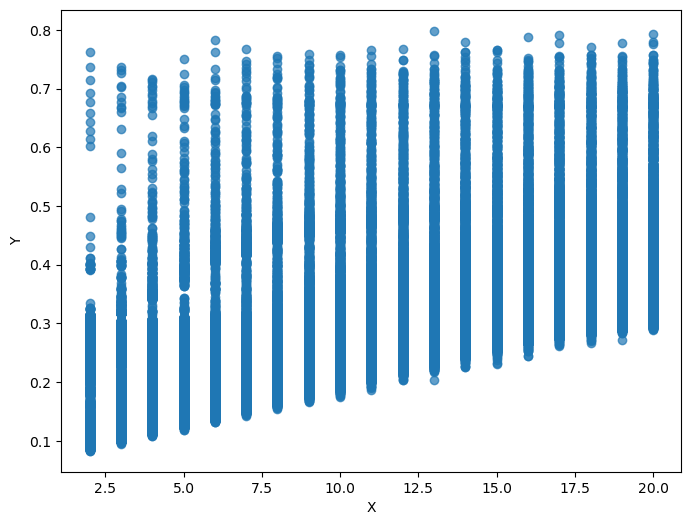

In [5]:
# 提取兩個維度，例如 data[:, :, 0, 0, 0]
x = np.arange(21)  # 第一維的索引
y = data[:, :, :, :, 1].flatten()  # 固定其他維度

x_repeat = np.repeat(x, y.size // x.size)

mask = y != -1  # 建立布爾掩碼，True 表示需要的值
y_filtered = y[mask]  # 過濾 y
x_filtered = x_repeat[mask]  # 同步過濾 x

# 繪製散佈圖
plt.figure(figsize=(8, 6))
plt.scatter(x_filtered, y_filtered, alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


### color analyze

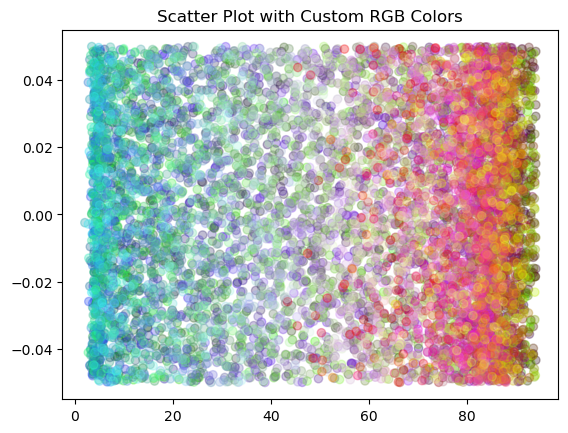

In [45]:
combinations = ((i, j, k) for i in range(21) for j in range(21) for k in range(21))

colors = []

x = []

y = []

color_range = (0, 1)

read_axis = 0

for i, j, k in combinations:

    if np.mean(data[i][j][k][:][read_axis]) == -1 : continue

    x.append(np.mean(data[i, j, k, :, read_axis]))

    y.append(np.random.uniform(-0.05, 0.05))
    
    colors.append((
        i/21,
        j/21,
        k/21,
    ))

plt.scatter(x, y, c=colors, alpha=0.3)
plt.title('Scatter Plot with Custom RGB Colors')
plt.show()

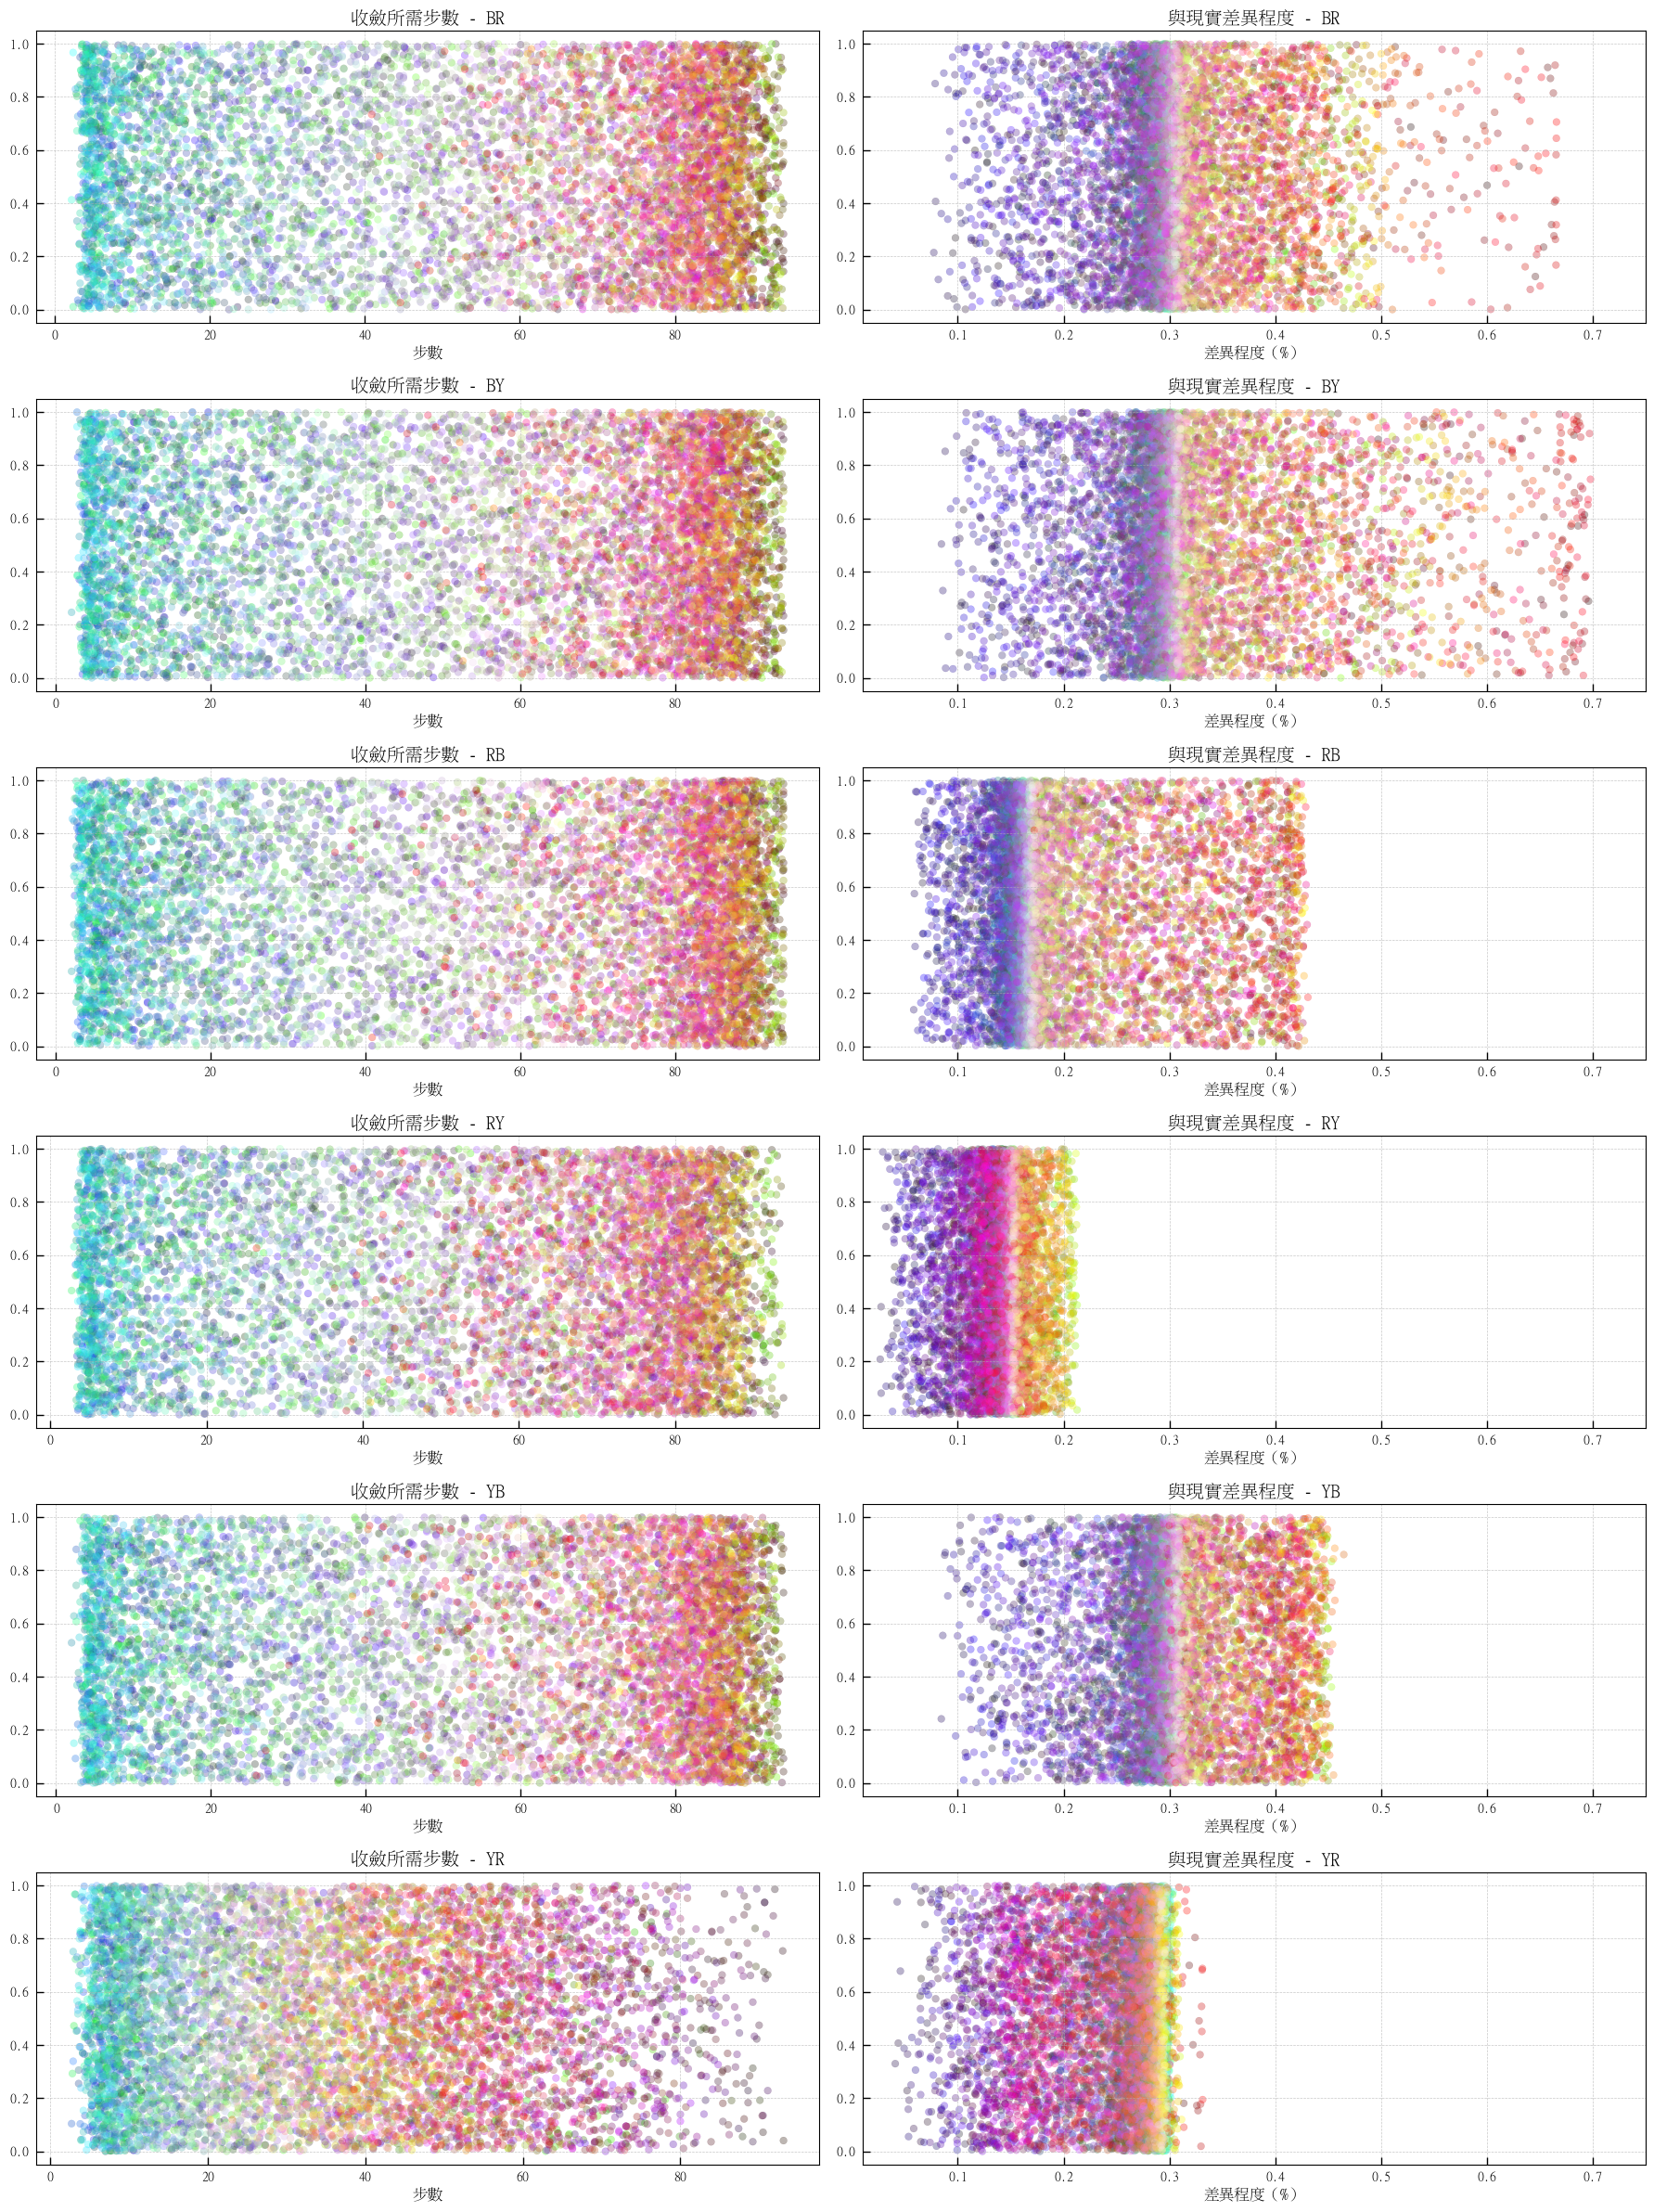

In [114]:
x1, x2, y, colors = [], [], [], []

color_range = 20
read_axis = 0

skipped_count = 0

fig, axes = plt.subplots(6, 2, figsize=(18, 24))

for index, t in enumerate(exp_types):
    
    data = np.load(os.path.join(FOLDER, f"PreprocessData\\data_{t}.npy"))

    combinations = ((i, j, k) for i in range(21) for j in range(21) for k in range(21))

    x1, x2, y, colors = [], [], [], []

    for i, j, k in combinations:

        if np.mean(data[i, j, k, :, 0]) == -1 : continue

        x1.append(np.mean(data[i, j, k, :, 0]))
        x2.append(np.mean(data[i, j, k, :, 1]))

        y.append(np.random.uniform(0, 1))
        
        colors.append((
            i/color_range,
            j/color_range,
            k/color_range,
        ))

    # 左边的图
    axes[index, 0].scatter(x1, y, c=colors, alpha=0.3)
    set_plot_style(axes[index, 0], f'收斂所需步數 - {t}', '步數')

    # 右边的图
    axes[index, 1].scatter(x2, y, c=colors, alpha=0.3)
    set_plot_style(axes[index, 1], f'與現實差異程度 - {t}', '差異程度（%）')
    axes[index, 1].set_xlim(0.01, 0.75)

# 调整布局
plt.tight_layout()

plt.savefig(
    os.path.join(FOLDER, "output.png"), 
    dpi=300, bbox_inches='tight'
)  # 儲存為 PNG 格式

# 显示图形
plt.show()